<a href="https://www.kaggle.com/code/najibhasan/najib-hasan-malaria-detection-using-svm?scriptVersionId=93516988" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import glob
import cv2
import seaborn as sns
from skimage.filters import sobel
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#resizing image
size = 128

In [3]:
#Capture images and labels into array
#Start by creating empty lists

train_images = []
train_labels = []

# for directory_path in glob.glob("/kaggle/input/malaria-detection-dataset/Dataset/Train/*"):
#     label = directory_path.split("/")[-1]
#     #print(label)
#     for img_path in glob.glob(os.path.join(directory_path,"*.jpg")):
#         print(img_path)


for directory_path, _, filenames in os.walk('/kaggle/input/malaria-detection-dataset/Dataset/Train/'):
    label = directory_path.split("/")[-1]
    #print(label)
    for filename in filenames:
        img_path = os.path.join(directory_path, filename)
        #print(img_path)
        
        img = cv2.imread(img_path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(size,size))
        #img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [4]:
# train_images = train_images.reshape(len(train_images), -1)
# train_images.shape

In [5]:
#Do the same for test images

test_images = []
test_labels = []

for directory_path, _, filenames in os.walk('/kaggle/input/malaria-detection-dataset/Dataset/Test/'):
    label = directory_path.split("/")[-1]
    #print(label)
    for filename in filenames:
        img_path = os.path.join(directory_path, filename)
        #print(img_path)
        
        img = cv2.imread(img_path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(size,size))
        #img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [6]:
# test_images = test_images.reshape(len(test_images), -1)
# test_images.shape

In [7]:
#Encode labels from text (folder_names) to integers
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [8]:
#Split data into test and train datasets

x_train,y_train,x_test,y_test = train_images,train_labels_encoded,test_images,test_labels_encoded

#Normalize pixel value between 0 and 1

x_train,x_test = x_train/255.0, x_test/255.0

In [9]:
#Reshape to a vector for SVM training


#x_for_svm = np.reshape(x_train,(x_train.shape[0],-1))
x_for_svm = x_train.reshape(len(x_train), -1)
x_for_svm.shape

(416, 49152)

In [10]:
#Reshape test dataset

#test_for_svm = np.reshape(x_test,(x_test.shape[0],-1))
test_for_svm = x_test.reshape(len(x_test), -1)
test_for_svm.shape

(134, 49152)

In [11]:
#Define the classifier

from sklearn import svm
#We have to use kernel to get accuracy. we can use here either linear or poly or rbf kernel to ger higher accuracy
#we can use decision_function_shape = 'ovr' or 'ovo' or 'none'
SVM_model = svm.SVC(kernel = 'rbf', decision_function_shape = 'ovo')
SVM_model.fit(x_for_svm,y_train)
#SVM_model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),steps_per_epoch=len(x_train) // 32, epochs=epochs)

SVC(decision_function_shape='ovo')

In [12]:
#Using random forest classifier
#from sklearn.ensemble import RandomForestClassifier

#randomForest = RandomForestClassifier(max_depth=10, random_state=0)
#randomForest.fit(x_for_svm,y_train)

In [13]:
#Using Decision tree classifier
# from sklearn.tree import DecisionTreeClassifier
# d_tree_model = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=0)
# d_tree_model.fit(x_for_svm,y_train)

In [14]:
# import graphviz 
# from sklearn import tree
# dot_data = tree.export_graphviz(d_tree_model, out_file=None, 
#                               feature_names=x_for_svm,  
#                               class_names=y_train,  
#                               filled=True, rounded=True,  
#                               special_characters=True)

# graph = graphviz.Source(dot_data) 

# graph 

In [15]:
#predict on test

#test_prediction = SVM_model.predict(test_for_svm)

#predict on test for random forest

#test_prediction = randomForest.predict(test_for_svm)

#predict for Decision Tree

test_prediction = SVM_model.predict(test_for_svm)

#inverse le transform to get original label back

test_prediction = le.inverse_transform(test_prediction)
#Accuracy for SVM =  0.5597014925373134
#Accuracy for Random Forest =  0.6791044776119403
#Accuracy for Decision Tree using entropy = 0.6268656716417911
#Accuracy for Decision Tree using gini = 0.7388059701492538

In [16]:
#print overall accuracy

from sklearn import metrics
print("Accuracy = ",metrics.accuracy_score(test_labels,test_prediction))

Accuracy =  0.5597014925373134


The prediction for this image is :  ['Uninfected']
The actual label for this image is :  Parasite


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


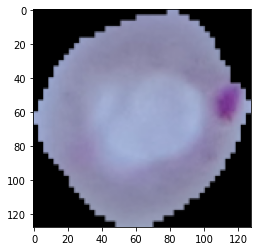

In [17]:
#check results for a few random images

import random
n = random.randint(0,x_test.shape[0]-1)
img = x_test[n]
plt.imshow(img);

#predict

input_img = np.expand_dims(img,axis = 0)
img_new = np.reshape(img,(input_img.shape[0],-1))
img_prediction = SVM_model.predict(img_new)
img_prediction = le.inverse_transform([img_prediction])
print("The prediction for this image is : ", img_prediction)
print("The actual label for this image is : ", test_labels[n])